In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks to Approximate Solution of PDEs

In [7]:
from pinn import NNAnsatz, PINNTrainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your task: Solve the system of equations using PINNs

System of two linear reaction-convection-diffusion equations

You will have to implement the following
1. initialize the approximate neural network solution
2. implement the functions add interior points, add temporal boundary points,
   and add spatial boundary points; 
3. implement the function apply initial condition;
4. implement the function apply boundary conditions;
5. implement the function compute pde residuals;
6. train the model.









# Setting up the training data

Just familiarize yourself with how we generate collocation points for the different types of residuals.

In [ ]:
alpha_f =0.05 
h_f =5 
t_hot =4 
u_f =1
alpha_s = 0.08
h_s = 6
t0 = 1

In [4]:
# Solve the heat equation:
# u_t = u_xx, (t,x) in [0, 0.1]x[-1,1]
# with zero dirichlet BC and
# u(x,0)= -sin(pi * x).

n_int = 256
n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb)

In [33]:
my_data = np.genfromtxt('SubExample.csv', delimiter=',', skip_header=1)

In [38]:
input_int  = torch.Tensor(my_data[:,0:2])

In [41]:
my_data.shape[0]


100000

In [26]:
import torch
torch_data = torch.Tensor(data_train[['t', 'x']].values)

In [27]:
torch_data

tensor([[0.6241, 0.8950],
        [0.7835, 0.7780],
        [0.3981, 0.4690],
        ...,
        [0.7189, 0.1000],
        [0.9540, 0.2470],
        [0.4636, 0.7400]])

In [28]:
input_int_

tensor([[ 5.2734e-03, -1.6602e-01],
        [ 3.0527e-01,  8.3398e-01],
        [ 4.5527e-01, -6.6602e-01],
        [ 1.5527e-01,  3.3398e-01],
        [ 2.3027e-01, -9.1602e-01],
        [ 5.3027e-01,  8.3984e-02],
        [ 3.8027e-01, -4.1602e-01],
        [ 8.0273e-02,  5.8398e-01],
        [ 1.1777e-01, -5.4102e-01],
        [ 4.1777e-01,  4.5898e-01],
        [ 5.6777e-01, -4.1016e-02],
        [ 2.6777e-01,  9.5898e-01],
        [ 1.9277e-01, -2.9102e-01],
        [ 4.9277e-01,  7.0898e-01],
        [ 3.4277e-01, -7.9102e-01],
        [ 4.2773e-02,  2.0898e-01],
        [ 6.1523e-02, -8.5352e-01],
        [ 3.6152e-01,  1.4648e-01],
        [ 5.1152e-01, -3.5352e-01],
        [ 2.1152e-01,  6.4648e-01],
        [ 2.8652e-01, -1.0352e-01],
        [ 5.8652e-01,  8.9648e-01],
        [ 4.3652e-01, -6.0352e-01],
        [ 1.3652e-01,  3.9648e-01],
        [ 9.9023e-02, -4.7852e-01],
        [ 3.9902e-01,  5.2148e-01],
        [ 5.4902e-01, -9.7852e-01],
        [ 2.4902e-01,  2.148

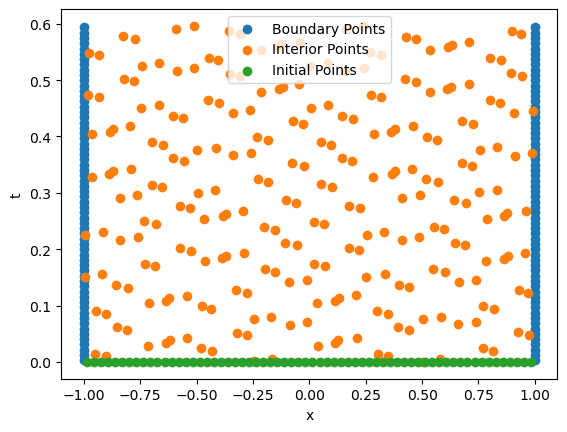

In [20]:
# Plot the input training points.
input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()

plt.scatter(
    input_sb_[:, 1].detach().numpy(),
    input_sb_[:, 0].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_int_[:, 1].detach().numpy(),
    input_int_[:, 0].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_tb_[:, 1].detach().numpy(),
    input_tb_[:, 0].detach().numpy(),
    label="Initial Points")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

# Training

Train your network and ensure your loss is low, and that your predictions are qualitatively similar to the true solution (plots should look similar).

In [ ]:
hist = pinn.fit(num_epochs=13, verbose=True)

plt.figure(dpi=150)
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

In [ ]:
pinn.plot()